In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_moons
from sklearn.utils import shuffle

In [2]:
n = 10016
batch_size = 32

In [3]:
X, Y = make_moons(n_samples=n, noise=0.1)
X, Y = shuffle(X, Y, random_state=72)

In [4]:
Xs = []
Ys = []
batch_num = int(np.ceil(len(X) / batch_size))

In [5]:
for i in range(batch_num):
    start = i * batch_size
    end = start + batch_size
    Xs.append(X[start:end])
    Ys.append(Y[start:end])

In [6]:
Xs = np.array(Xs).reshape(batch_num, batch_size, 2, 1)
Ys = np.array(Ys).reshape(batch_num, batch_size, 1, 1)
X = X.reshape(n, 2, 1)
Y = Y.reshape(n, 1, 1)

In [7]:
size = [2, 10, 5, 1]

In [8]:
weights = [0]
biases = [0]
for i in range(0, len(size) - 1):
    weights.append(np.random.rand(size[i + 1], size[i]))
    biases.append(np.random.rand(size[i + 1], 1))

In [9]:
weights

[0,
 array([[0.90765643, 0.61385118],
        [0.19192193, 0.21690282],
        [0.89602355, 0.13915738],
        [0.72139315, 0.48377989],
        [0.99802684, 0.35387479],
        [0.05880201, 0.18506672],
        [0.4159414 , 0.18600529],
        [0.48567197, 0.46704365],
        [0.18783095, 0.11245734],
        [0.49493272, 0.10076805]]),
 array([[0.83990258, 0.6072849 , 0.46454385, 0.73285554, 0.11483111,
         0.63552823, 0.11025435, 0.24574127, 0.90010436, 0.10463342],
        [0.58917823, 0.11980568, 0.51842396, 0.48925008, 0.04766595,
         0.12035428, 0.98819394, 0.85417381, 0.82193184, 0.26704803],
        [0.92736335, 0.69447358, 0.66823127, 0.22701957, 0.14446726,
         0.449403  , 0.60827854, 0.7295188 , 0.37919122, 0.13722644],
        [0.32492533, 0.08001106, 0.03855515, 0.6363424 , 0.08233884,
         0.74479329, 0.90038516, 0.44000077, 0.03737007, 0.95758025],
        [0.74829808, 0.8442702 , 0.47657823, 0.95001832, 0.09990628,
         0.42257496, 0.913348

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [12]:
def feed_forward(xi, weights, biases):
    activations = [xi]
    z1 = weights[1] @ xi + biases[1]
    a1 = sigmoid(z1)
    activations.append(a1)
    for i in range(2, len(weights)):
        zn = weights[i] @ activations[-1] + biases[i]
        an = sigmoid(zn)
        activations.append(an)
    return activations

In [13]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

In [14]:
def backprop(weights, biases, xi, y, activations):
    deltas = [0] * len(activations)
    dL_dwK = [0] * len(activations)
    dL_dbK = [0] * len(activations)
    
    deltas[-1] = ( activations[-1] - y ) * sigmoid_derivative(activations[-1])
    dL_dwK[-1] = deltas[-1] @ activations[-1].T
    dL_dbK[-1] = deltas[-1]
    
    for i in range(len(deltas)-2, 0, -1):
        deltas[i] = ( weights[i+1].T @ deltas[ i + 1 ] ) * sigmoid_derivative(activations[i])
        dL_dwK[i] = deltas[i] @ activations[ i - 1 ].T
        dL_dbK[i] = deltas[i]
    
    return dL_dwK, dL_dbK

In [15]:
act = feed_forward(Xs[0][2], weights, biases)
print(act)
bc = backprop(weights, biases, Xs[0][2], Ys[0][2], act)[0]
for w in bc:
    if type(w) is not int: print(w.shape)

[array([[0.97837833],
       [0.02643668]]), array([[0.79446926],
       [0.75096918],
       [0.70898573],
       [0.76521622],
       [0.74720755],
       [0.71280398],
       [0.75956046],
       [0.79937224],
       [0.71191653],
       [0.67741277]]), array([[0.98397974],
       [0.99005218],
       [0.98806099],
       [0.97434123],
       [0.99550605]]), array([[0.99125888]])]
(10, 2)
(5, 10)
(1, 1)


In [16]:
epochs = 20
lr = 0.1
loss = []

In [17]:
for i in tqdm(range(epochs)):
    epochloss = 0
    for j in range(batch_num):
        for i, xi in enumerate(Xs[j]):
            activations = feed_forward(xi, weights, biases)
            epochloss += L(activations[-1], Ys[j,i])
    
            dL_dw, dL_db = backprop(weights, biases, xi, Ys[j,i], activations)
            
            for i, w in enumerate(weights):
                w -= lr * dL_dw[i]
            for i, b in enumerate(biases):
                b -= lr * dL_db[i]
            
    loss.append(epochloss / n)

100%|███████████████████████████████████████████| 20/20 [00:05<00:00,  3.45it/s]


In [18]:
weights

[0,
 array([[ 7.22117009,  2.47858589],
        [-1.30614208,  0.98074994],
        [ 0.66989695, -0.26620474],
        [-0.79675709,  0.91846329],
        [ 4.52950625, -1.45569794],
        [-1.02757977,  1.04014726],
        [-1.25405977,  0.94189935],
        [-1.40212785,  1.02711099],
        [-1.08959555,  0.90306047],
        [ 0.8269604 , -0.90044989]]),
 array([[-4.46209685e+00, -1.55159273e+00,  1.63130237e+00,
         -6.27438799e-02,  1.83463438e+00, -8.47102454e-01,
         -1.55880753e+00, -1.93452693e+00, -8.62851174e-01,
          2.08933417e+00],
        [-7.60888157e-01, -7.54416312e-01,  3.67287357e-01,
         -1.13501807e-02, -5.35964967e-02, -6.11998268e-01,
          2.30812883e-01,  2.72202761e-03,  1.18082125e-01,
          1.42714438e-01],
        [ 4.02006525e-01, -3.83999024e-01, -1.75500946e+00,
         -5.26130107e-01, -2.72187997e+00,  1.13471064e-01,
          1.29347647e-02, -3.34586303e-01, -4.20710729e-01,
         -7.91156921e-01],
        [-7.1

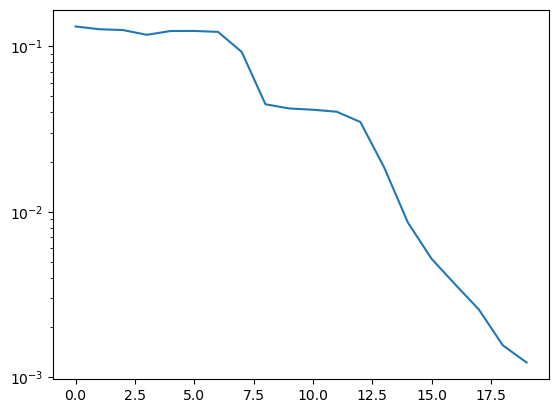

In [19]:
xcoord = np.array([n for n in range(epochs)]).reshape(epochs, 1)
ycoord = np.array(loss).reshape(epochs, 1)
plt.plot(xcoord, ycoord)
#plt.xscale('log')
plt.yscale('log')

In [20]:
def evaluate_visually(x, w, b):
    rb = []
    for xi in x:
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: rb.append('red')
        else: rb.append('blue')
    return rb

In [21]:
rb = evaluate_visually(X.reshape(n, 2, 1), weights, biases)

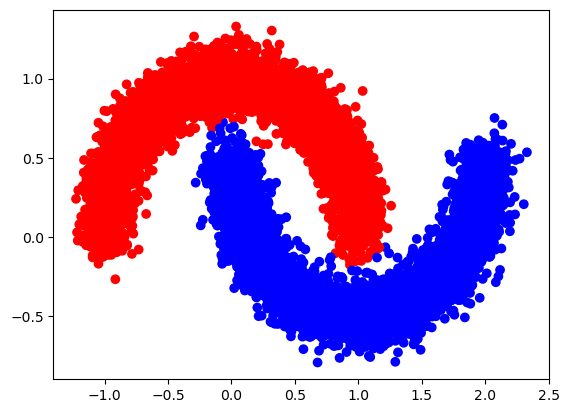

In [22]:
plt.scatter(Xs[:,:,0,:], Xs[:,:,1,:], c=rb)

In [23]:
def evaluate_errors(x, w, b, y):
    rb = []
    for i, xi in enumerate(x):
        p = 0
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: p = 0
        else: p = 1
        if p == Y[i, 0]:
            rb.append('gray')
        else: rb.append('red')
    return rb

In [24]:
br = evaluate_errors(X, weights, biases, Y)

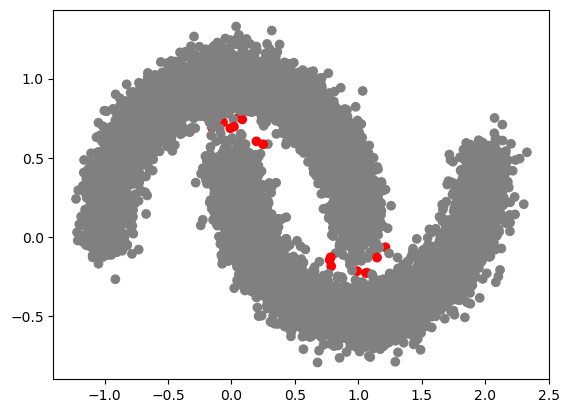

In [25]:
plt.scatter(X[:,0,:], X[:,1,:], c=br)

In [26]:
inc = 0
for c in br: 
    if c == 'red': inc += 1
print(f'Training Accuracy {inc} / {n} : {((n-inc)/n)*100:.2f}%')

Training Accuracy 16 / 10016 : 99.84%
